<a href="https://colab.research.google.com/github/IANovoselov/data_science/blob/main/ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

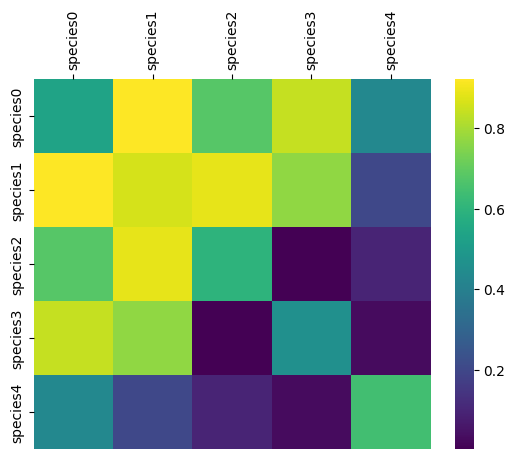

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('genome_matrix.csv', index_col=0)

g = sns.heatmap(df, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
#df.plot()

#sns.lineplot(x=df.index, y=df.income)

#df.income.plot()

#df.plot(kind='line')


#plt.plot(df.index, df.income)
#df['income'].plot()

In [26]:
df

,x,y
0,1396.439661,1502.557846
1,1315.427619,598.910693
2,117.638907,804.362630
3,1022.681095,898.857682
4,1011.092025,904.005493
...,...,...
75,1000.273507,906.916492
76,802.003563,1094.389091
77,1112.852945,1020.872461
78,91.734998,814.361315


<Axes: >

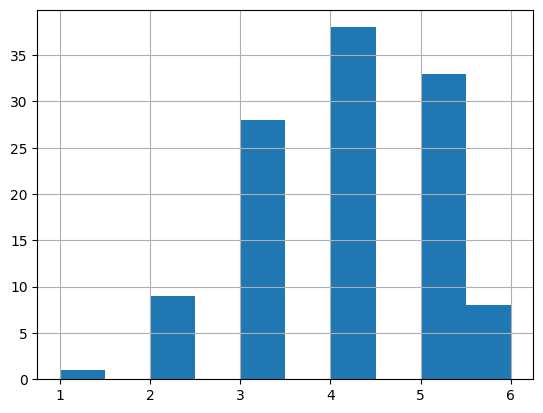

In [44]:
df = pd.read_csv('dota_hero_stats.csv', index_col=0)
df.roles.apply(lambda k: len(eval(k))).hist()

In [51]:
df

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
